<a href="https://colab.research.google.com/github/msilvadev/Data-Science-Portfolio/blob/main/notebooks/Analisando_os_Dados_do_Airbnb_Berlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science**
*by [Matheus Silva](https://www.linkedin.com/in/matheussilva-io/)*

---

# Análise dos Dados do Airbnb - *Berlim*

O [Airbnb](https://www.airbnb.com.br/) é considerado como sendo a **maior empresa hoteleira da atualidade**. Um detalhe interessante, é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

Até o final de setembro de 2020, eles possuiam **5,6 milhões** de anúncios em todo o mundo, **100 mil cidades** com anúncios ativos, e mais de **220 países e regiões** com acomodações do [Airbnb](https://www.airbnb.com.br/)

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Berlim, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Os dados utilizados aqui foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Site no qual o Airbnb disponibiliza alguns de seus dados.

Para a análise exploratória aqui, será utilizado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Berlin (good for visualisations).*

Obs: A data de compilação dos dados utizados nesta análise é de **12 de Março de 2021**.


In [5]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/germany/be/berlin/2021-03-12/visualisations/listings.csv")

## Análise dos Dados

Nesta etapa iremos criar uma conciência situacional e assim permitir o entendimento de como os dados importados estão estruturados.

**Dicionário das variáveis**

* `id` - Número para identificar unicamente cada imóvel
* `name` - Nome da propriedade anúnciada
* `host_id` - Número para identificar o proprietário (anfitrião) da propriedade
* `host_name` Nome do anfitrião
* `neighbourhood_group` - Grupos de vizinhaça geocodificado utilizando latitude e longitude.
* `neighbourhood` - Nome do bairro
* `latitude` - Coordenada de latitude da propriedade
* `longitude` - Coordenada de longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel
* `minimun_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Quantidade de avaliações que a propriedade possui
* `last_reviews` - Data da última avaliação
* `reviews_per_month` - Quantidade de avaliações que a propriedade recebe por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [10]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Começando a análise do nosso *dataset*, iremos identificar o volume que nosso conjunto de dados possui, e também os tipo de dado de cada coluna existente.

Este *dataset* que baixamos é a versão resumida do Airbnb da cidade de Berlim. Na mesma página em que baixamos os arquivo `listings.csv`, há uma versão mais completa e detalhada (`listings.csv.gz`)

In [19]:
# identificar o volume de dados do DataFrame
print("Quantidade de  Entradas:\t {}".format(df.shape[0]))
print("Quantidade de Variáveis: \t {}\n".format(df.shape[1]))

# verificar os tipos de dados de cada coluna/variável
display(df.dtypes)

Quantidade de  Entradas:	 19858
Quantidade de Variáveis: 	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Quando estamos realizando para um trabalho de **Data Science**/**Análise de Dados**, a qualidade de um *dataset* é de extrema importância. E a qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. E é importante entender logo no início de nossa análise se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as variáveis `reviews_per_month` e `last_review` possuem pouco mais de **20%** de valores nulos.
* As variáveis `host_name` e `name` têm aproximadamente **0,1%** dos valores nulos.

In [20]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.206718
last_review                       0.206718
host_name                         0.046933
name                              0.001611
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

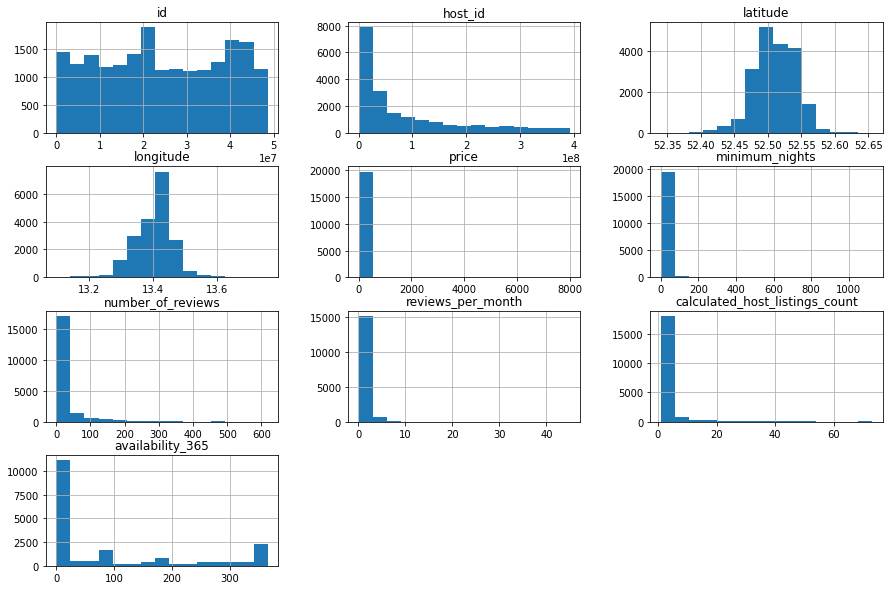

In [21]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Por exemplo as variáveis `price`, `minimum_nights`, `number_of_reviews`.

Os valore não seguem uma distribuição, e acabam distorcendo toda a representação gráfica. Para confirmar está hipótese, há duas maneira rápidas que nos auxiliam a detecção de *outliers*. São elas:

* Resumo estatíístico por meio do método `describe()` do nosso *dataframe*
* Plotar `boxplots` para a variável que queremos avaliar.

In [24]:
# ver o resumo estátistico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19858.000000,19858.000000,19858.000000,15753.000000,19858.000000,19858.000000
mean,70.778930,8.604240,21.918622,0.674096,3.148454,94.663964
std,120.383995,30.954859,48.038176,1.131620,7.642956,131.877521
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,2.000000,1.000000,0.090000,1.000000,0.000000
50%,50.000000,3.000000,4.000000,0.260000,1.000000,0.000000
75%,80.000000,5.000000,18.000000,0.770000,2.000000,178.000000
max,8000.000000,1124.000000,618.000000,45.000000,73.000000,365.000000


Analisando o resumo estátistico acima, conseguimos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor >= à €80.00, porém o seu valor máximo é de € 8000.00.
* A quantidade mínima de noite (`minimum_nights`) está acima de 365 dias no ano

#### Boxplot para minimum_nights

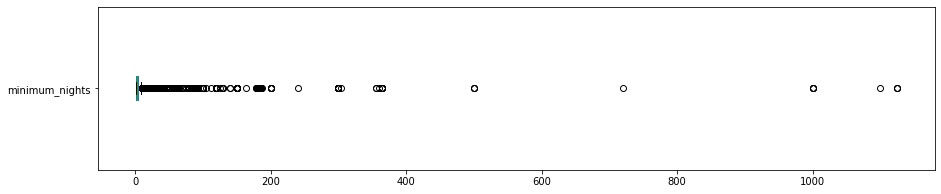

minimum_nights: valores acima de 30:
902 entradas
4.5422%


In [25]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

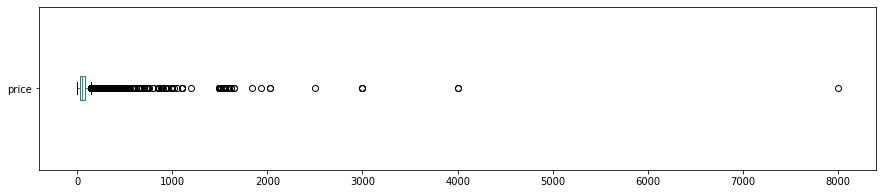


price: valores acima de 100
2629 entradas
13.2390%


In [36]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 100 para price
print("\nprice: valores acima de 100")
print("{} entradas".format(len(df[df.price > 100])))
print("{:.4f}%".format((len(df[df.price > 100]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Agora que identificamos *outliers* nas variáveis `minimum_nights` e `price`, iremos limpar nosso *dataframe* deles e plotar um novo histograma.

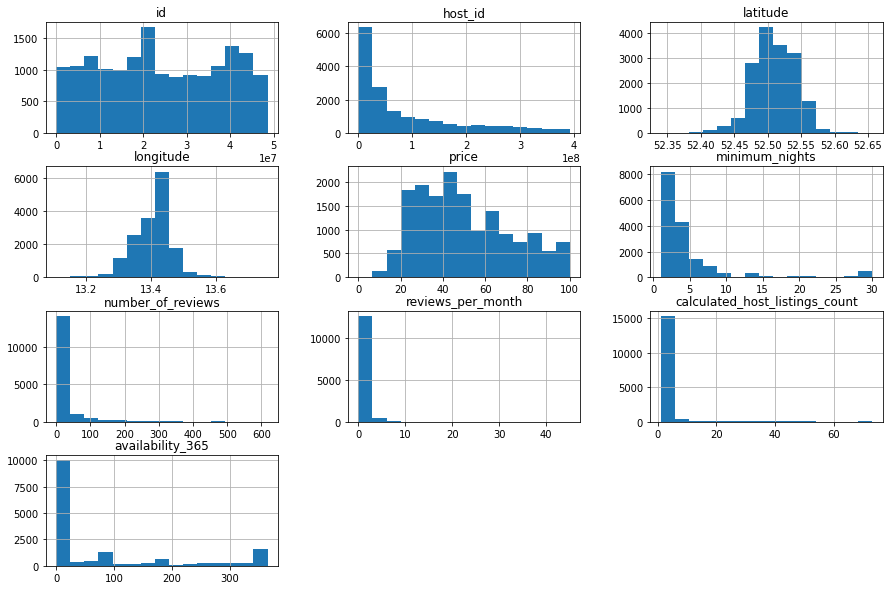

In [37]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 100].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as corrlações existentes entre as variáveis de interesse, vou: 

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [38]:
# Criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.023159,0.046219,0.055707,0.034211,0.170155
minimum_nights,-0.023159,1.000000,-0.087937,-0.105791,0.115295,0.070927
number_of_reviews,0.046219,-0.087937,1.000000,0.742654,0.041517,0.244433
reviews_per_month,0.055707,-0.105791,0.742654,1.000000,0.101733,0.272370
calculated_host_listings_count,0.034211,0.115295,0.041517,0.101733,1.000000,0.259667
availability_365,0.170155,0.070927,0.244433,0.272370,0.259667,1.000000


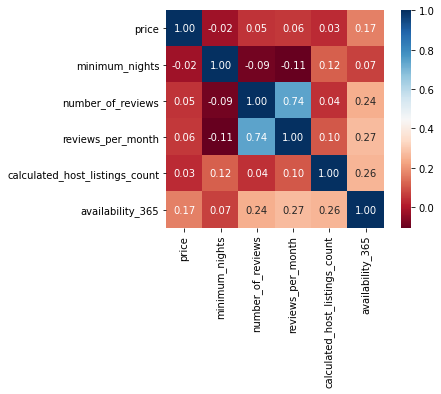

In [42]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [43]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       8130
Entire home/apt    7922
Shared room         276
Hotel room           74
Name: room_type, dtype: int64

In [44]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.495671
Entire home/apt    0.482990
Shared room        0.016827
Hotel room         0.004512
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Berlim?**
Uma maneira de se verificar uma variável em função da outra é usando o metódo `groupby()` do nosso *dataframe*. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

*Obs: Preço em Euro.*


In [52]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Neu-Hohenschönhausen Nord                    85.000000
Altstadt-Kietz                               70.428571
Rahnsdorf/Hessenwinkel                       68.600000
Schmöckwitz/Karolinenhof/Rauchfangswerder    67.833333
Regierungsviertel                            63.640000
Müggelheim                                   61.375000
Prenzlauer Berg Südwest                      61.196030
Brunnenstr. Süd                              60.961456
Kurfürstendamm                               60.409524
Buckow Nord                                  59.400000
Zehlendorf  Südwest                          59.256410
Helmholtzplatz                               59.054662
Lichtenrade                                  58.785714
Alexanderplatz                               58.174834
Marzahn-Süd                                  58.090909
Grünau                                       58.000000
Friedrichshagen                              56.952381
Prenzlauer Berg Süd                          56.752

Acima vimos que o bairro *Neu-Hohenschönhausen Nord* está com a média de preço superior aos demais.

Porém apenas para exemplificar de como uma amostra pode ser não-representativa, veja quantas entradas há para o bairro *Neu-Hohenschönhausen Nord*.

In [50]:
# ver quantidade de imóveis no Neu-Hohenschönhausen Nord
print(df_clean[df_clean.neighbourhood == "Neu-Hohenschönhausen Nord"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Neu-Hohenschönhausen Nord"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2596,6315422,"75 qm flat in a quiet, green area",32854189,Tony,Lichtenberg,Neu-Hohenschönhausen Nord,52.57436,13.50841,Entire home/apt,85,1,0,NaN,NaN,1,0


Como são fornecidas as Latitudes e Longitudes para os imóveis em nosso *dataset*, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

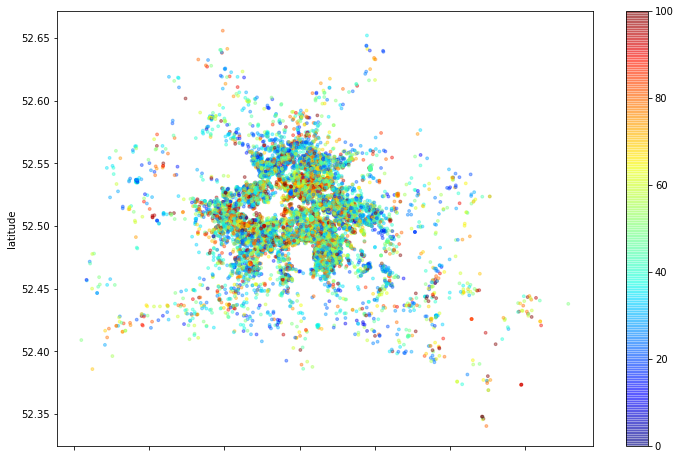

In [51]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Trata-se de uma análise superficial na base de dados que obtemos do Airbnb, porém podemos perceber a existência de outliers em algumas variáveis.

Notamos também que possuem localidades com poucos imóveis listados, o que pode distorcer as informações estatísticas de alguns dos atributos.

Lembrem-se de que o *dataset* que foi utilizado é uma versão resumida, ideal apenas para uma aborgem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos com todos atributos disponíveis.